In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

valid_languages = ['en', 'es', 'fr', 'de']

def pie(data, labelname):
    temp = data[labelname].value_counts()
    df = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                       })

    labels = df['labels']
    sizes = df['values']
    patches, texts = plt.pie(sizes, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.show()


0it [00:00, ?it/s]

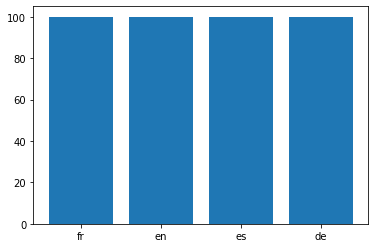

0it [00:00, ?it/s]

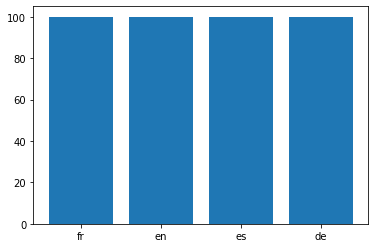

0it [00:00, ?it/s]

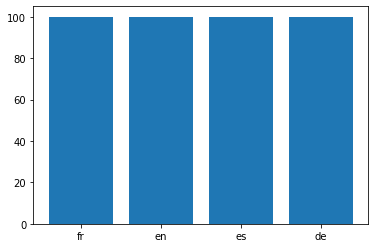

In [2]:
files = ['Data/pancealab/2021-01-01_clean-dataset.tsv',
         'Data/pancealab/2021-02-01_clean-dataset.tsv',
         'Data/pancealab/2021-03-01_clean-dataset.tsv']
for i, f in enumerate(files):
    data = pd.read_csv(f, sep='\t')
    v_counts = data['lang'].value_counts()
    # pie(data, 'lang')
    valid_data = pd.DataFrame(columns=data.columns)
    lang_indices = {}
    # add each index to its label
    languages = data["lang"]
    for j, lang in tqdm(enumerate(languages)):
        if lang in valid_languages:
            if lang not in lang_indices:
                lang_indices[lang] = []
            lang_indices[lang].append(j)
    for lang in valid_languages:
        valid_data = valid_data.append(data.iloc[lang_indices[lang][:100]])
    valid_data.to_csv('Data/FilteredTwitterIDs/' + str(i) + '.csv')
    v_counts = valid_data['lang'].value_counts()
    plt.bar(v_counts.index, v_counts.values)
    plt.show()